# Problem Statement.
Zomato training dataset contains city wise list of restaurants and the cuisines they serve, along with the ratings, reviews, votes and delivery time. Here we predict the Delivery Time over the test data considering all these factors.
initially we visualise the training data to get a breif idea about the dataset we're working on. we use EDA to perform the visualization that would brief us about the dataset.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

In [2]:
#importing train and test data
train = pd.read_excel("F:\dataset\my project data\Participants Data/Data_Train.xlsx")
test = pd.read_excel("F:\dataset\my project data\Participants Data/Data_Test.xlsx")

In [3]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [4]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


# Cleaning Train and Test data
The dataset contains ₹ sign, removing it, also the delivery time has values wwritten in form of "30 minutes", removing minutes from delivery time so we can have an integer value.

In [5]:
# removing the ₹ sign from train set
train["Average_Cost"] = train["Average_Cost"].str.replace("₹","")
train["Minimum_Order"] = train["Minimum_Order"].str.replace("₹","")
train["Delivery_Time"] = train["Delivery_Time"].str.replace("minutes","")

In [14]:
# removing the ₹ sign from test set
test["Average_Cost"] = test["Average_Cost"].str.replace("₹","")
test["Minimum_Order"] = test["Minimum_Order"].str.replace("₹","")

# Extracting City names from Location Column
The location column present in both i.e test and train dataset has complete address of the restaurant. we extract the city names from it in order to simplify for model building and visualization

In [6]:
#extracting cities from address
train['City.Pune'] = train['Location'].apply(lambda x: 'Pune' if 'Pune' in x else None)
train['City.Kolkata'] = train['Location'].apply(lambda x: 'Kolkata' if 'Kolkata' in x else None)
train['City.Mumbai'] = train['Location'].apply(lambda x: 'Mumbai' if 'Mumbai' in x else None)
train['City.Bangalore'] = train['Location'].apply(lambda x: 'Bangalore' if 'Bangalore' in x else None)
train['City.Delhi'] = train['Location'].apply(lambda x: 'Delhi' if 'Delhi' in x else None)
train['City.Hyderabad'] = train['Location'].apply(lambda x: 'Hyderabad' if 'Hyderabad' in x else None)
train['City.Noida'] = train['Location'].apply(lambda x: 'Noida' if 'Noida' in x else None)
train['City.Gurgaon'] = train['Location'].apply(lambda x: 'Gurgaon' if 'Gurgaon' in x else None)
train['City.Majestic'] = train['Location'].apply(lambda x: 'Bangalore' if 'Majestic' in x else None)
train['City.Marathalli'] = train['Location'].apply(lambda x: 'Bangalore' if 'Marathalli' in x else None)
train['City.Electronic'] = train['Location'].apply(lambda x: 'Bangalore' if 'Electronic' in x else None)
train['City.Gurgoan'] = train['Location'].apply(lambda x: 'Gurgaon' if 'Gurgoan' in x else None)
train['City.Whitefield'] = train['Location'].apply(lambda x: 'Bangalore' if 'Whitefield' in x else None)

train['City'] = train['City.Pune'].map(str)+train['City.Kolkata'].map(str)+train['City.Mumbai'].map(str)+train['City.Bangalore'].map(str)+train['City.Delhi'].map(str)+train['City.Hyderabad'].map(str)+train['City.Noida'].map(str)+train['City.Gurgaon'].map(str)+train['City.Majestic'].map(str)+train['City.Marathalli'].map(str)+train['City.Electronic'].map(str)+train['City.Gurgoan'].map(str)+train['City.Whitefield'].map(str)

train['City'] = train['City'].apply(lambda x: x.replace('None',''))

new_train = train[['Restaurant','Location','City','Cuisines','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time']]

In [15]:
#extracting cities from address
test['City.Pune'] = test['Location'].apply(lambda x: 'Pune' if 'Pune' in x else None)
test['City.Kolkata'] = test['Location'].apply(lambda x: 'Kolkata' if 'Kolkata' in x else None)
test['City.Mumbai'] = test['Location'].apply(lambda x: 'Mumbai' if 'Mumbai' in x else None)
test['City.Bangalore'] = test['Location'].apply(lambda x: 'Bangalore' if 'Bangalore' in x else None)
test['City.Delhi'] = test['Location'].apply(lambda x: 'Delhi' if 'Delhi' in x else None)
test['City.Hyderabad'] = test['Location'].apply(lambda x: 'Hyderabad' if 'Hyderabad' in x else None)
test['City.Noida'] = test['Location'].apply(lambda x: 'Noida' if 'Noida' in x else None)
test['City.Gurgaon'] = test['Location'].apply(lambda x: 'Gurgaon' if 'Gurgaon' in x else None)
test['City.Majestic'] = test['Location'].apply(lambda x: 'Bangalore' if 'Majestic' in x else None)
test['City.Marathalli'] = test['Location'].apply(lambda x: 'Bangalore' if 'Marathalli' in x else None)
test['City.Electronic'] = test['Location'].apply(lambda x: 'Bangalore' if 'Electronic' in x else None)
test['City.Gurgoan'] = test['Location'].apply(lambda x: 'Gurgaon' if 'Gurgoan' in x else None)
test['City.Whitefield'] = test['Location'].apply(lambda x: 'Bangalore' if 'Whitefield' in x else None)

test['City'] = test['City.Pune'].map(str)+test['City.Kolkata'].map(str)+test['City.Mumbai'].map(str)+test['City.Bangalore'].map(str)+test['City.Delhi'].map(str)+test['City.Hyderabad'].map(str)+test['City.Noida'].map(str)+test['City.Gurgaon'].map(str)+test['City.Majestic'].map(str)+test['City.Marathalli'].map(str)+test['City.Electronic'].map(str)+test['City.Gurgoan'].map(str)+test['City.Whitefield'].map(str)

test['City'] = test['City'].apply(lambda x: x.replace('None',''))

new_test = test[['Restaurant','Location','City','Cuisines','Average_Cost','Minimum_Order','Rating','Votes','Reviews']]


# Counting Number of cuisines
Every restaurant has a variety of food to offer that affects the preparation time and later affects the delivery time. so making a count of every cuisine they offer by making a count of it 

In [7]:
#creating a function to count number of cuisines in particular restaurant
def countoc(s):
    a = s.split(',')
    return len(a)


In [8]:
new_train['Count Cuisine'] = new_train['Cuisines'].apply(lambda x:countoc(x))
del(new_train['Restaurant'])
del(new_train['Location'])
del(new_train['Cuisines'])

new_train['City'], _ = pd.factorize(new_train['City'], sort=True)

new_train.dtypes

C:\Users\AJINKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\AJINKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


City              int64
Average_Cost     object
Minimum_Order    object
Rating           object
Votes            object
Reviews          object
Delivery_Time    object
Count Cuisine     int64
dtype: object

In [16]:
new_test['Count Cuisine'] = new_test['Cuisines'].apply(lambda x:countoc(x))
del(new_test['Restaurant'])
del(new_test['Location'])
del(new_test['Cuisines'])

new_test['City'], _ = pd.factorize(new_test['City'], sort=True)

new_test.dtypes

C:\Users\AJINKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\AJINKYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


City              int64
Average_Cost     object
Minimum_Order    object
Rating           object
Votes            object
Reviews          object
Count Cuisine     int64
dtype: object

In [9]:
cols = ['Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time']
new_train[cols] = new_train[cols].apply(pd.to_numeric, errors = 'coerce')

new_train.dtypes

C:\Users\AJINKYA\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


City               int64
Average_Cost     float64
Minimum_Order      int64
Rating           float64
Votes            float64
Reviews          float64
Delivery_Time      int64
Count Cuisine      int64
dtype: object

In [17]:
cols = ['Average_Cost','Minimum_Order','Rating','Votes','Reviews']
new_test[cols] = new_test[cols].apply(pd.to_numeric, errors = 'coerce')

new_test.dtypes

C:\Users\AJINKYA\Anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


City               int64
Average_Cost     float64
Minimum_Order      int64
Rating           float64
Votes            float64
Reviews          float64
Count Cuisine      int64
dtype: object

# Visualizing Train Data

In [53]:
train_city = train.iloc[:,[0,1,2,3,4,5,6,7,8,-1]]

Text(0.5, 1.0, 'City Vs Number of Restaurants')

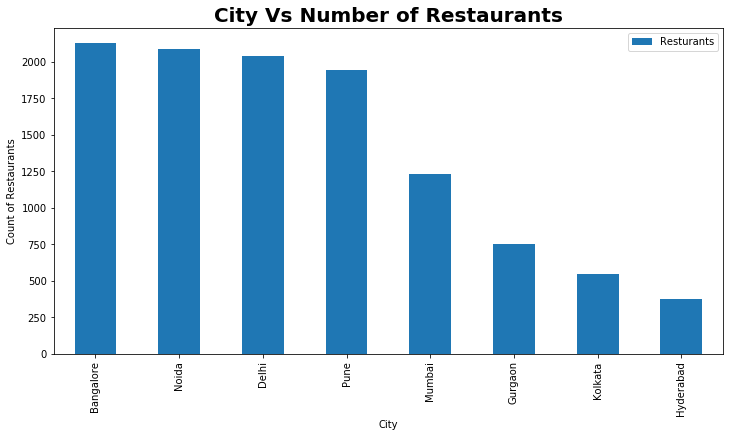

In [54]:
from matplotlib import pyplot as plt
plt.figure(figsize = (12,6))
ax = train_city.City.value_counts().plot(kind = 'bar')
ax.legend(['Resturants'])
plt.xlabel("City")
plt.ylabel("Count of Restaurants")
plt.title("City Vs Number of Restaurants",fontsize=20,weight='bold')

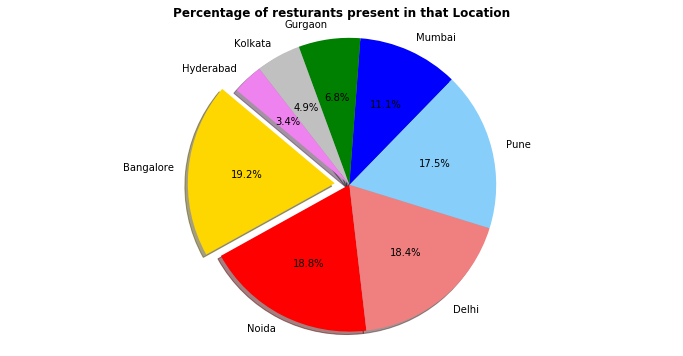

In [55]:
#Location wise distribution of resturant records
plt.figure(figsize=(12,6))
names = train_city['City'].value_counts()[:10].index
values = train_city['City'].value_counts()[:10].values
colors = ['gold','red','lightcoral','lightskyblue','blue','green','silver', 'violet']
explode = (0.1,0,0,0,0,0,0,0)
plt.pie(values,explode=explode,labels=names,colors=colors,autopct='%1.1f%%',shadow =True,startangle=140)
plt.axis('equal')
plt.title('Percentage of resturants present in that Location', weight='bold')
plt.show()

Text(0.5, 0, 'Delivery_Time')

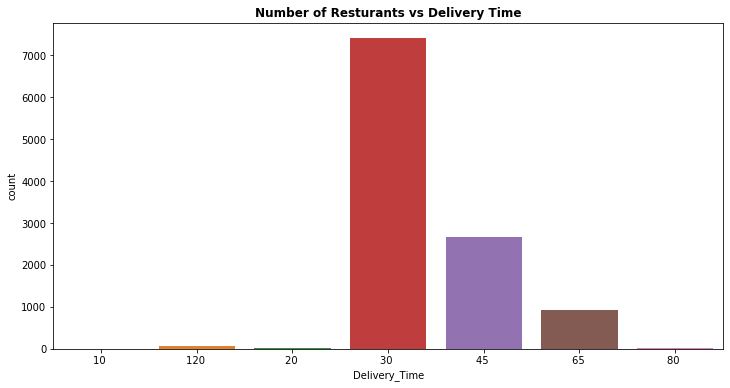

In [56]:
import seaborn as sns
plt.figure(figsize=(12,6))
ax1=sns.countplot(train_city['Delivery_Time'])
plt.title('Number of Resturants vs Delivery Time', weight='bold')
plt.xlabel('Delivery_Time')

Text(0.5, 1.0, 'Rating vs Delivery Time distribution')

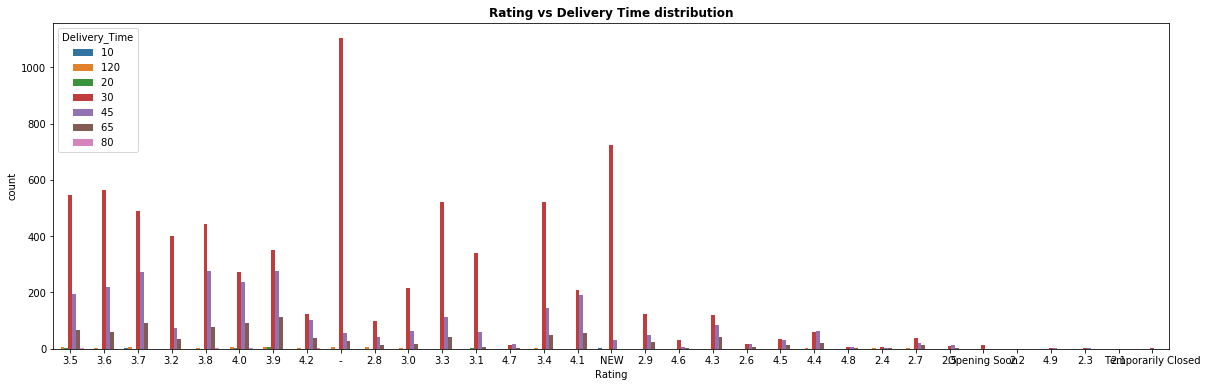

In [57]:
plt.figure(figsize=(20,6))
ax2 = sns.countplot(x='Rating',hue='Delivery_Time',data=train_city)
plt.title('Rating vs Delivery Time distribution',weight='bold')

Text(0.5, 1.0, 'City vs Delivery Time distribution')

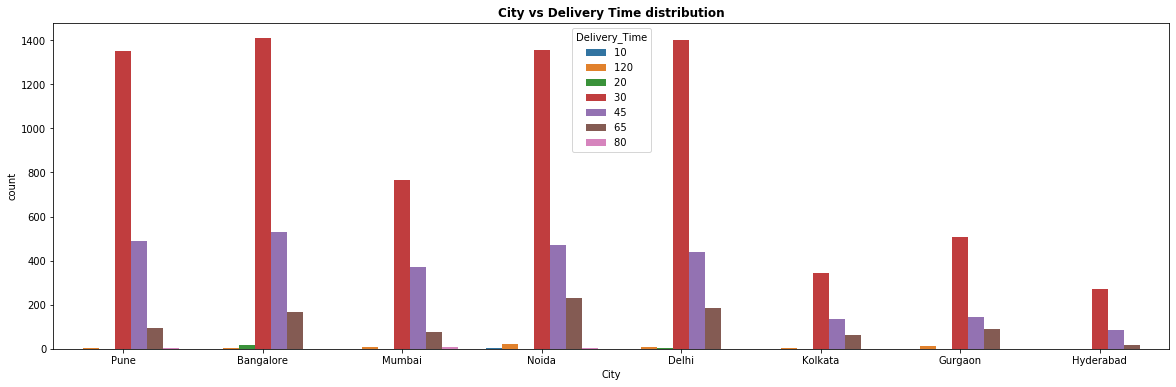

In [58]:
plt.figure(figsize=(20,6))
ax2 = sns.countplot(x='City',hue='Delivery_Time',data=train_city)
plt.title('City vs Delivery Time distribution',weight='bold')

# Using KNN Imputation to replace missing values

In [10]:
new_train.isna().sum()

City                0
Average_Cost       25
Minimum_Order       0
Rating           1963
Votes            2074
Reviews          2312
Delivery_Time       0
Count Cuisine       0
dtype: int64

In [11]:
# imputing missing values in training data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1, weights="uniform")
new_train=imputer.fit_transform(new_train)
new_train=pd.DataFrame(new_train)

#Assigning Coloumns names as per its index.
new_train.columns = ['City','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Delivery_Time','Cuisine_Count']


In [12]:
#seperating x and y variables
x = new_train.iloc[:,[0,1,2,3,4,5,7]].values
y = new_train.iloc[:, 6]

In [18]:
new_test.isna().sum()

City               0
Average_Cost       6
Minimum_Order      0
Rating           507
Votes            542
Reviews          593
Count Cuisine      0
dtype: int64

In [19]:
# imputing missing values in testing data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1, weights="uniform")
new_test=imputer.fit_transform(new_test)
new_test=pd.DataFrame(new_test)

#Assigning Coloumns names as per its index.
new_test.columns = ['City','Average_Cost','Minimum_Order','Rating','Votes','Reviews','Cuisine_Count']

# Using XGBoost Classifier to make predictions

In [13]:
#Applying XGBoost Classifier to predict time
from xgboost import XGBClassifier
import xgboost as xgb
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x,y)

#checking accuracy of training model
XGBoost_Accuracy = xgb_classifier.score(x,y)
print("Accuracy for XGBoost Classifier is :", XGBoost_Accuracy)


Accuracy for XGBoost Classifier is : 0.7312060573282856


In [21]:
#predicting delivery time on test data

test_xgc = np.array(new_test)
y_predictions_xgbclassifier = xgb_classifier.predict(test_xgc)

test_xgc = pd.DataFrame(test_xgc)
test_xgc['delivery time'] = y_predictions_xgbclassifier

In [22]:
test_xgc.head()

,0,1,2,3,4,5,6,delivery time
0,0.0,350.0,50.0,4.2,361.0,225.0,3.0,30.0
1,0.0,100.0,50.0,3.3,14.0,5.0,2.0,30.0
2,6.0,100.0,50.0,3.6,36.0,16.0,1.0,30.0
3,1.0,200.0,50.0,3.6,66.0,33.0,5.0,30.0
4,6.0,150.0,50.0,2.9,38.0,14.0,2.0,30.0


# Creating a new dataframe for visualisation
As we factoriezed City, the city names got converted into numeric values. In order to visualise the given data, it would be best suited if we get the actual city names back. we can achieve that by performing concatination of two dataset by adding specific coloumns of the dataset

In [26]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,City.Pune,City.Kolkata,...,City.Delhi,City.Hyderabad,City.Noida,City.Gurgaon,City.Majestic,City.Marathalli,City.Electronic,City.Gurgoan,City.Whitefield,City
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",350,50,4.2,361,225,None,None,...,None,None,None,None,None,None,None,None,None,Bangalore
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",100,50,NEW,-,-,None,None,...,None,None,None,None,None,None,None,None,None,Bangalore
2,ID_4620,"Sector 1, Noida",Fast Food,100,50,3.6,36,16,None,None,...,None,None,Noida,None,None,None,None,None,None,Noida
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",200,50,3.6,66,33,None,None,...,Delhi,None,None,None,None,None,None,None,None,Delhi
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",150,50,2.9,38,14,None,None,...,None,None,Noida,None,None,None,None,None,None,Noida


In [27]:
city_merge = test.iloc[:,[0,1,2,-1]]

In [60]:
test_city = pd.concat([city_merge,test_xgc], axis = 1)

In [61]:
test_final = test_city.iloc[:,[0,1,2,3,5,6,7,8,9,10,11]]
test_final.head()

,Restaurant,Location,Cuisines,City,1,2,3,4,5,6,delivery time
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",Bangalore,350.0,50.0,4.2,361.0,225.0,3.0,30.0
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",Bangalore,100.0,50.0,3.3,14.0,5.0,2.0,30.0
2,ID_4620,"Sector 1, Noida",Fast Food,Noida,100.0,50.0,3.6,36.0,16.0,1.0,30.0
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",Delhi,200.0,50.0,3.6,66.0,33.0,5.0,30.0
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",Noida,150.0,50.0,2.9,38.0,14.0,2.0,30.0


In [62]:
test_final.columns = ['Restaurant', 'Location', 'Cuisines', 'City', 'Average_Cost','Minimum_Order','Rating','Votes','Reviews','Cuisine_Count', 'Delivery Time']

In [63]:
test_final.head()

,Restaurant,Location,Cuisines,City,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cuisine_Count,Delivery Time
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",Bangalore,350.0,50.0,4.2,361.0,225.0,3.0,30.0
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",Bangalore,100.0,50.0,3.3,14.0,5.0,2.0,30.0
2,ID_4620,"Sector 1, Noida",Fast Food,Noida,100.0,50.0,3.6,36.0,16.0,1.0,30.0
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",Delhi,200.0,50.0,3.6,66.0,33.0,5.0,30.0
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",Noida,150.0,50.0,2.9,38.0,14.0,2.0,30.0


# XGBoost Classifier Model

In [48]:
xgb_classifier = XGBClassifier(learning_rate = 1.2)
xgb_classifier.fit(x,y)

#checking accuracy of training model
XGBoost_Accuracy = xgb_classifier.score(x,y)
print("Accuracy for XGBoost Classifier is :", XGBoost_Accuracy)

Accuracy for XGBoost Classifier is : 0.8491076257436452


In [49]:
#predicting delivery time on test data

test_xgc = np.array(new_test)
y_predictions_xgbclassifier = xgb_classifier.predict(test_xgc)

test_xgc = pd.DataFrame(test_xgc)
test_xgc['delivery time'] = y_predictions_xgbclassifier

# Visualization on Test Predictions

Text(0.5, 1.0, 'City Vs Number of Restaurants')

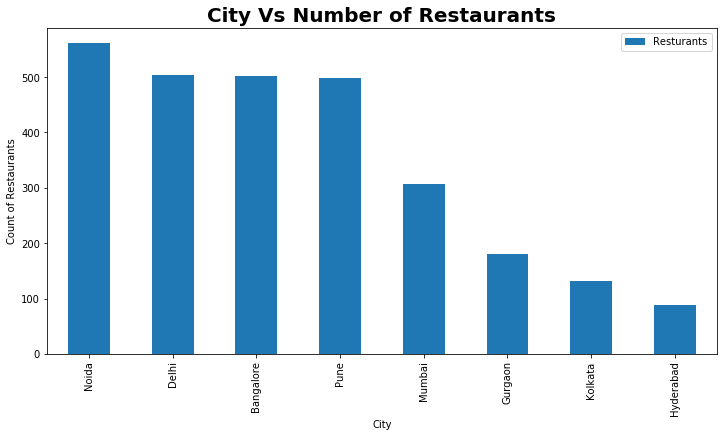

In [64]:
# import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
ax = test_final.City.value_counts().plot(kind = 'bar')
ax.legend(['Resturants'])
plt.xlabel("City")
plt.ylabel("Count of Restaurants")
plt.title("City Vs Number of Restaurants",fontsize=20,weight='bold')

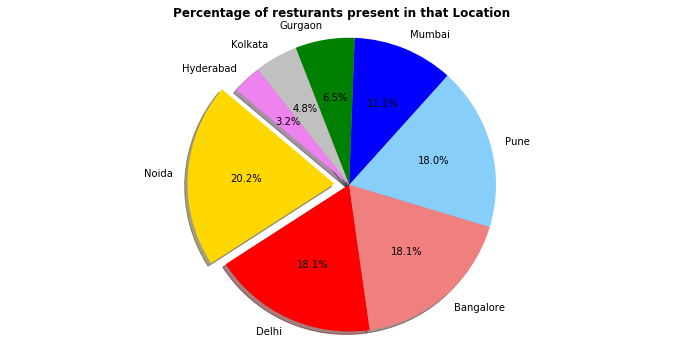

In [65]:
#Location wise distribution of resturant records
plt.figure(figsize=(12,6))
names = test_final['City'].value_counts()[:10].index
values = test_final['City'].value_counts()[:10].values
colors = ['gold','red','lightcoral','lightskyblue','blue','green','silver','violet']
explode = (0.1,0,0,0,0,0,0,0)
plt.pie(values,explode=explode,labels=names,colors=colors,autopct='%1.1f%%',shadow =True,startangle=140)
plt.axis('equal')
plt.title('Percentage of resturants present in that Location', weight='bold')
plt.show()

Text(0.5, 0, 'Delivery Time')

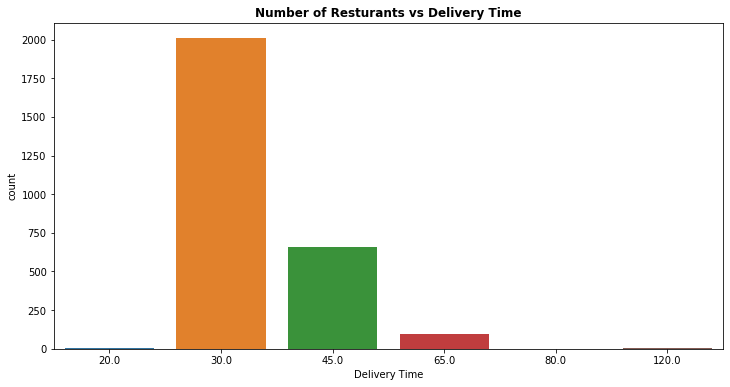

In [66]:
import seaborn as sns
plt.figure(figsize=(12,6))
ax1=sns.countplot(test_final['Delivery Time'])
plt.title('Number of Resturants vs Delivery Time', weight='bold')
plt.xlabel('Delivery Time')

Text(0.5, 1.0, 'Rating vs Delivery Time distribution')

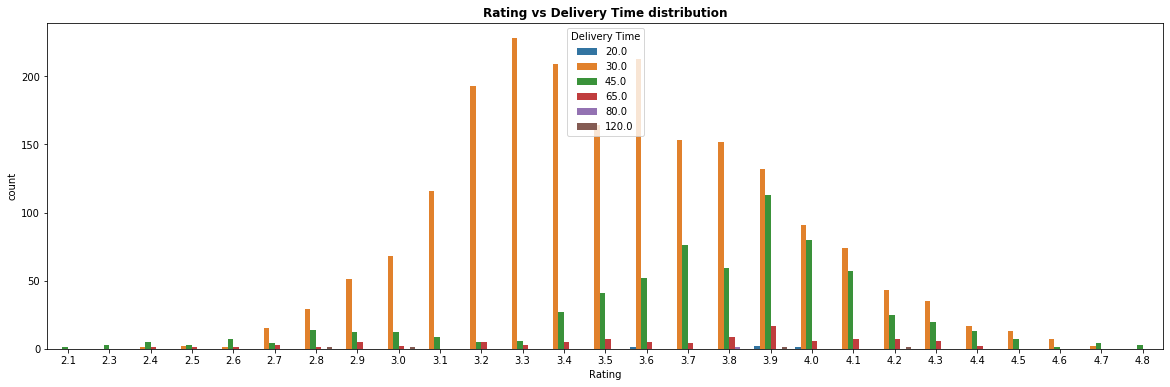

In [67]:
plt.figure(figsize=(20,6))
ax2 = sns.countplot(x='Rating',hue='Delivery Time',data=test_final)
plt.title('Rating vs Delivery Time distribution',weight='bold')

Text(0.5, 1.0, 'City vs Delivery Time distribution')

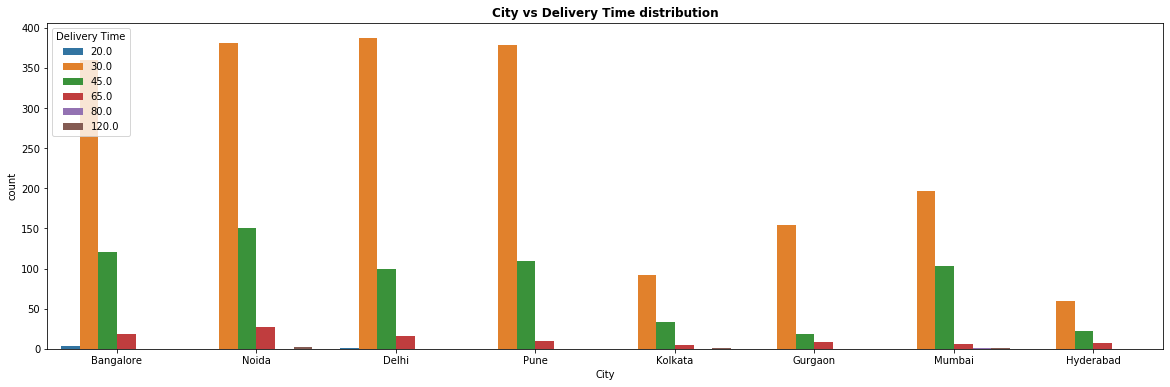

In [68]:
plt.figure(figsize=(20,6))
ax2 = sns.countplot(x='City',hue='Delivery Time',data=test_final)
plt.title('City vs Delivery Time distribution',weight='bold')

In [69]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City.Pune,...,City.Delhi,City.Hyderabad,City.Noida,City.Gurgaon,City.Majestic,City.Marathalli,City.Electronic,City.Gurgoan,City.Whitefield,City
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30,Pune,...,None,None,None,None,None,None,None,None,None,Pune
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30,None,...,None,None,None,None,None,Bangalore,None,None,None,Bangalore
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65,None,...,None,None,None,None,None,None,None,None,None,Mumbai
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30,None,...,None,None,Noida,None,None,None,None,None,None,Noida
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65,None,...,None,None,None,None,None,None,None,None,Bangalore,Bangalore
